In [2]:
import numpy as np
class NeuralNetwork:
    def __init__(self,layer_sizes):
        self.num_layers = len(layer_sizes) # layer number of NN
        self.layers = layer_sizes # node numbers of each layer
        #initialize connenct weights of layers
        self.weights = [np.random.randn(y,x) for x, y in zip(layer_sizes[:-1],layer_sizes[1:])]
        #initialize biases of each layer(input layer has no bias)
        self.biases = [np.random.randn(y,1) for y in layer_sizes[1:]]
    #sigmoid activation function
    def sigmoid(self,z):
        act = 1.0/(1.0 + np.exp(-z))
        #act=np.exp(z)/(1+np.exp(z))
        return act
    # derivative function of sigmoid activation function
    def sigmoid_prime(self,z):
        act = self.sigmoid(z)*(1.0-self.sigmoid(z))
        return act
    # feed forward to get prediction
    def feed_forward(self,x):
        output = x.copy()
        for w, b in zip(self.weights, self.biases):
            output = self.sigmoid(np.dot(w,output)+b)
        return output
    # feed backward to update NN paremeters
    def feed_backward(self,x,y):
        delta_b = [np.zeros(b.shape) for b in self.biases]
        delta_w = [np.zeros(w.shape) for w in self.weights]
        #activations of input layer
        activation = np.transpose(x)
        activations = [activation]
        # input after input layer
        layer_input = []
        #forward to get each layer’s input and output
        for b, w in zip(self.biases,self.weights):
            z = np.dot(w,activation) + b
            layer_input.append(z) #input of each layer
            activation = self.sigmoid(z)
            activations.append(activation)#output of each layer
        #loss funtion
        ground_truth = np.transpose(y)
        diff = activations[-1] - ground_truth
        #get input of last layer
        last_layer_input = layer_input[-1]
        delta = np.multiply(diff,self.sigmoid_prime(last_layer_input))
        #bias update of last layer
        delta_b[-1] = np.sum(delta,axis=1,keepdims=True)
        #weight update of last layer
        delta_w[-1] = np.dot(delta, np.transpose(activations[-2]))
        #update weights and bias from 2nd layer to last layer
        for i in range(2,self.num_layers):
            input_values = layer_input[-i]
            delta = np.multiply(np.dot(np.transpose(self.weights[-i+1]),delta),self.sigmoid_prime(input_values))
            delta_b[-i] = np.sum(delta,axis=1,keepdims=True)
            delta_w[-i] = np.dot(delta,np.transpose(activations[-i-1]))
        return delta_b,delta_w
    #training using BP
    def fit(self, x,y,learnrate,mini_batch_size, epochs=1000):
        n = len(x)#training size
        accuracy_history = []
        for i in range(epochs):
            randomlist = np.random.randint(0,n-mini_batch_size,int(n/mini_batch_size))
            batch_x = [x[k:k+mini_batch_size] for k in randomlist]
            batch_y = [y[k:k+mini_batch_size] for k in randomlist]
            for j in range(len(batch_x)):
                delta_b,delta_w = self.feed_backward(batch_x[j], batch_y[j])
                self.weights = [w - (learnrate/mini_batch_size)*dw for w, dw in
                                zip(self.weights,delta_w)]
                self.biases = [b - (learnrate/mini_batch_size)*db for b, db in
                               zip(self.biases,delta_b)]
            if (i+1)%100 == 0:
                labels = self.predict(x)
                acc = 0.0
                for k in range(len(labels)):
                    if y[k,labels[k]]==1.0:
                        acc += 1.0
                acc=acc/len(labels)
                accuracy_history.append(acc)
                print("iterations %d accuracy %.3f"%(i+1,acc))
        return accuracy_history
    #predict function
    def predict(self, x):
        results = self.feed_forward(x.T)
        labels = [np.argmax(results[:,y]) for y in range(results.shape[1])]
        return labels



In [3]:
#实践部分
import struct
import os
#fucntion to load MNIST data
def load_mnist_data(path,kind='train'):
    label_path = os.path.join(path, '%s-labels.idx1-ubyte'%kind)
    image_path = os.path.join(path, '%s-images.idx3-ubyte'%kind)
    with open(label_path,'rb') as lbpath: # open label file
        struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
    with open(image_path,'rb') as imgpath:# open image file
        struct.unpack('>IIII', imgpath.read(16))
        #transform image into 784-dimensional feature vector
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)
    return images,labels

#定义图片显示函数
import matplotlib.pyplot as plt
def show_image(image):
    plt.figure()
    img = image.reshape(28,28)
    plt.imshow(img, 'gray')
    plt.show()
#数据读取和预处理
from sklearn.preprocessing import StandardScaler
path = 'MNIST'
train_images, train_labels = load_mnist_data(path,kind='train')
# show_image(train_images)
train_y = np.zeros((len(train_labels),10))
for i in range(len(train_labels)):
    train_y[i,train_labels[i]]=1
scaler = StandardScaler()
train_x = scaler.fit_transform(train_images)
test_images, test_labels = load_mnist_data(path,kind='t10k')
# show_image(test_images)
test_y = np.zeros((len(test_labels),10))
for i in range(len(test_labels)):
    test_y[i,test_labels[i]]=1
test_x = scaler.fit_transform(test_images)


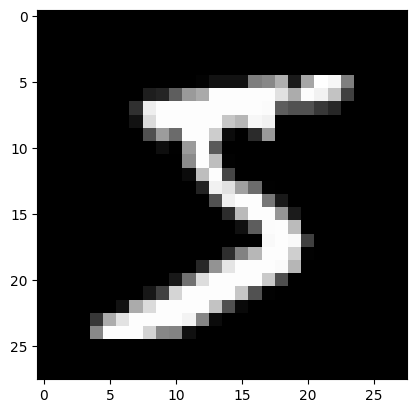

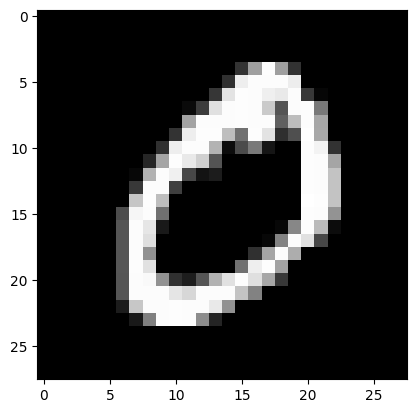

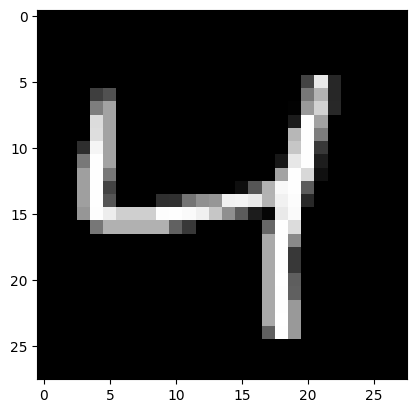

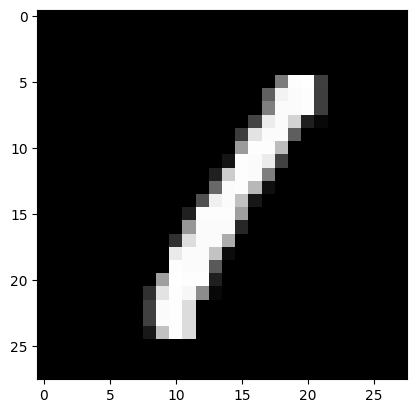

In [4]:
show_image(train_images[0])
show_image(train_images[1])
show_image(train_images[2])
show_image(train_images[3])

C:\Users\Polo\AppData\Local\Temp\ipykernel_1876\3735652634.py:12: RuntimeWarning: overflow encountered in exp
  act = 1.0/(1.0 + np.exp(-z))


iterations 100 accuracy 0.458
iterations 200 accuracy 0.557
iterations 300 accuracy 0.603
iterations 400 accuracy 0.658
iterations 500 accuracy 0.694
iterations 600 accuracy 0.706
iterations 700 accuracy 0.714
iterations 800 accuracy 0.719
iterations 900 accuracy 0.725
iterations 1000 accuracy 0.729
test accuracy:0.730


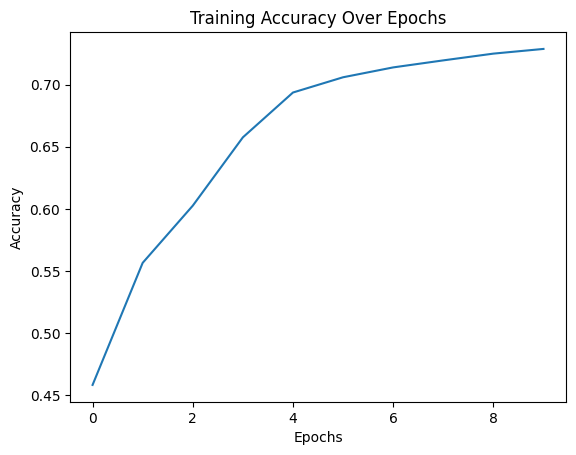

In [5]:
#构建模型
layer_sizes = [784,100,10]
NN = NeuralNetwork(layer_sizes)
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=1000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

C:\Users\Polo\AppData\Local\Temp\ipykernel_1876\3735652634.py:12: RuntimeWarning: overflow encountered in exp
  act = 1.0/(1.0 + np.exp(-z))


iterations 100 accuracy 0.274
iterations 200 accuracy 0.332
iterations 300 accuracy 0.367
iterations 400 accuracy 0.420
iterations 500 accuracy 0.496
iterations 600 accuracy 0.569
iterations 700 accuracy 0.588
iterations 800 accuracy 0.598
iterations 900 accuracy 0.605
iterations 1000 accuracy 0.610
iterations 1100 accuracy 0.614
iterations 1200 accuracy 0.618
iterations 1300 accuracy 0.621
iterations 1400 accuracy 0.624
iterations 1500 accuracy 0.627
iterations 1600 accuracy 0.629
iterations 1700 accuracy 0.631
iterations 1800 accuracy 0.632
iterations 1900 accuracy 0.634
iterations 2000 accuracy 0.635
iterations 2100 accuracy 0.637
iterations 2200 accuracy 0.638
iterations 2300 accuracy 0.639
iterations 2400 accuracy 0.640
iterations 2500 accuracy 0.641
iterations 2600 accuracy 0.642
iterations 2700 accuracy 0.643
iterations 2800 accuracy 0.644
iterations 2900 accuracy 0.644
iterations 3000 accuracy 0.645
iterations 3100 accuracy 0.646
iterations 3200 accuracy 0.646
iterations 3300 a

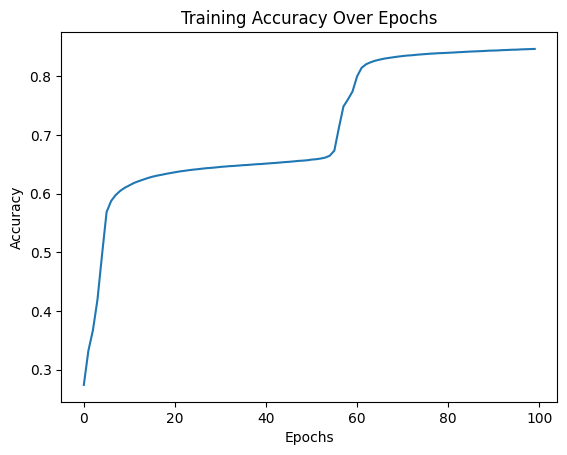

In [6]:
#构建模型
layer_sizes = [784,100,10]
NN = NeuralNetwork(layer_sizes)
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=10000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [21]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100),
                      solver='sgd',batch_size=100,learning_rate='constant',
                      learning_rate_init=0.01,max_iter=3000)
model.fit(train_x, train_y)
labels = model.predict(test_x)
acc = 0.0
for k in range(len(labels)):
    index = 0
    for j in range(10):
        if labels[k,j]==1:
            index = j
            break
    if test_y[k,index]==1.0:
        acc += 1.0
acc=acc/len(labels)
print("test accuracy:%.3f"%(acc))

test accuracy:0.960


In [22]:
from sklearn.neural_network import MLPClassifier
model1 = MLPClassifier(hidden_layer_sizes=(50),
                      solver='sgd',batch_size=100,learning_rate='constant',
                      learning_rate_init=0.01,max_iter=3000)
model1.fit(train_x, train_y)
labels1 = model1.predict(test_x)
acc1 = 0.0
for k in range(len(labels1)):
    index = 0
    for j in range(10):
        if labels1[k,j]==1:
            index = j
            break
    if test_y[k,index]==1.0:
        acc1 += 1.0
acc1=acc1/len(labels1)
print("test accuracy:%.3f"%(acc1))

test accuracy:0.951


In [23]:
from sklearn.neural_network import MLPClassifier
model2 = MLPClassifier(hidden_layer_sizes=(200),
                      solver='sgd',batch_size=100,learning_rate='constant',
                      learning_rate_init=0.01,max_iter=3000)
model2.fit(train_x, train_y)
labels2 = model2.predict(test_x)
acc2 = 0.0
for k in range(len(labels2)):
    index = 0
    for j in range(10):
        if labels2[k,j]==1:
            index = j
            break
    if test_y[k,index]==1.0:
        acc2 += 1.0
acc2=acc2/len(labels1)
print("test accuracy:%.3f"%(acc2))

test accuracy:0.966


In [ ]:
from sklearn.neural_network import MLPClassifier
model2 = MLPClassifier(hidden_layer_sizes=(1000),
                      solver='sgd',batch_size=100,learning_rate='constant',
                      learning_rate_init=0.01,max_iter=3000)
model2.fit(train_x, train_y)
labels2 = model2.predict(test_x)
acc2 = 0.0
for k in range(len(labels2)):
    index = 0
    for j in range(10):
        if labels2[k,j]==1:
            index = j
            break
    if test_y[k,index]==1.0:
        acc2 += 1.0
acc2=acc2/len(labels1)
print("test accuracy:%.3f"%(acc2))